In [1]:
import sys
import warnings
warnings.filterwarnings(action='ignore')
import collections
from IPython.display import display
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

mpl.rcParams['axes.unicode_minus'] = False
font_fname = '/Users/seongdae/Library/Fonts/NanumGothicLight.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()

rc('font', family=font_name)
# size, family
print ('font size : '+str(plt.rcParams['font.size']) )
print ('font family : '+str(plt.rcParams['font.family']) )
# import default setting
print('python version : {0}\npandas version : {1}\nmatplotlib version : {2}\nnumpy version : {3}\n'
.format(sys.version, pd.__version__, mpl.__version__, np.__version__))

font size : 10.0
font family : ['NanumGothic']
python version : 3.7.6 (v3.7.6:43364a7ae0, Dec 18 2019, 14:18:50) 
[Clang 6.0 (clang-600.0.57)]
pandas version : 0.25.3
matplotlib version : 3.1.2
numpy version : 1.18.1



# 분류용 선형 모델

## binary classification

In [2]:
# 선형 모델은 분류에도 널리 사용됨, 이진 분류(binary classification)의 경우를 살펴보겠음
    # 보통 로지스틱 회귀는 선형 함수에 시그모이드 함수가 적용된 것으로 표현됨
    # 분류의 기준이되는 시그모이드 함수의 결과값은 0.5로 선형 함수가 0일때 이므로 선형 함수를 기준으로 나타낼 수 있음
    # predict를 위한 방정식은 예측값(y^) = w[0]*x[0] + w[1]*x[1] ... + w[n]*x[n] +b > 0
    # 으로 나타내어짐, 계수(w_기울기), 절편(b)을 찾고 0보다 작으면 클래스를 -1, 크다면 +1 이라 예측함
# 회귀를 위한 선형 모델에서는 출력(y^)이 특성의 선형 함수가 되었음
# 분류를 위한 선형 모델에서는 '결정 경계'가 입력의 선형 함수임
    # (이진) 선형 분류기는 선, 평면, 초평면을 사용해서 두 개(혹은 그이상)의 클래스를 구분하는 분류기임

In [3]:
# 선형 모델을 학습시키는 알고리즘은 크게 두 방법로 구분되어짐
    # 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘맞는지 측정하는 방법
    # 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지
# 알고리즘들은 훈련 세트를 잘 학습하는지 측정하는 방법도 각기 다름
# 만들어지는 잘못된 분류의 수를 최소화 하도록 w와 b를 직접 조정하는 것은 불가능

In [4]:
# 널리 알려진 큰 두개의 알고리즘
    # '로지스틱 회귀(Logistic regression)', 이름은 회귀지만 분류를 위한 알고리즘임 (내부에서 회귀를 사용하는 알고리즘, 그러나 목적은 분류)
    # svm.LinearSVC(Support Vector Classifier)에 구현된 선형 '서포트 벡터 머신(SVM, Support Vector Machine)'

## forge dataset(LogisticRegression, LinearSVC)

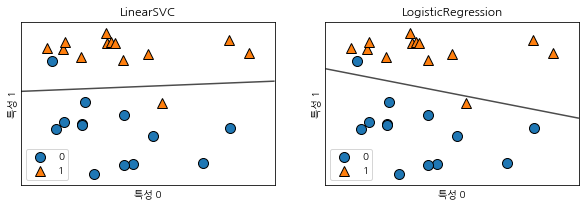

In [5]:
# forge dataset use
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize = (10, 3)) # 1행 2열의 그래프

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7) # 여기 매개변수 알파는 선(결정경계)의 굵기
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
    ax.legend(loc='best')

In [6]:
# LinearSVC와 LinearRegression 둘다 L2 규제를 사용함
# 두개의 데이터 포인터를 잘못분류한걸 볼 수 있음
    # 규제 강도를 조절하는 매개변수 C 존재 (둘다 Default 1.0임)
    # C값이 높을 수록 규제는 감소함, C값이 낮을 수록 규제는 강해짐(계수 벡터_w가 0에 가까워지도록함)
    # 다르게 말하면, 알고리즘은 C의 값이 낮아지면 데이터 포인터 중 다수에 맞추려고 하고,
    # C의 값을 높이면 개개의 포인터를 정확히 분류하도록 노력함, 데이터들의 값에 민감해짐..

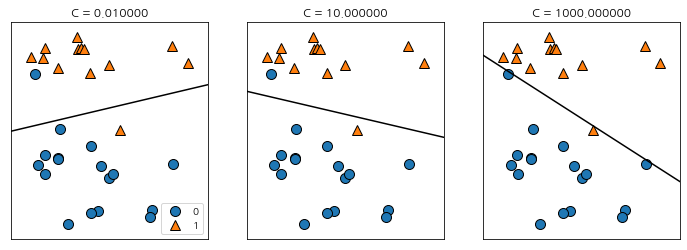

In [7]:
# LinearSVC, C값에 따른 변화
mglearn.plots.plot_linear_svc_regularization()

In [8]:
# 강한규제 -> -> 약한 규제(과적합)
# 회귀와 비슷하게 분류에서의 선형 모델은 낮은 차원에 데이터에서는 결정경계가 직선을 이루거나 평면이어서 제한적인 것처럼 보임
# 그러나, 고차원에선 분류에 대한 선형모델이 강력해짐, 특성이 많아지면 과대적합 되지 않게 하는 것이 중요해짐

## 유방암 데이터셋 사용 (LogisticRegression)

In [49]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
logreg_C1 = LogisticRegression().fit(X_train, y_train)
logreg_C10000 = LogisticRegression(C=10000).fit(X_train, y_train)
logreg_C00001 = LogisticRegression(C=0.0001).fit(X_train, y_train)
print('logreg_C1 훈련 세트 점수 : {:.4f}'.format(logreg_C1.score(X_train, y_train)))
print('logreg_C1 테스트 세트 점수 : {:.4f}'.format(logreg_C1.score(X_test, y_test)))
# C 값을 10000을 사용, 훈련 세트 점수는 그대로, 테스트 세트의 정확도 조금 상승
print('logreg_C10000 훈련 세트 점수 : {:.4f}'.format(logreg_C10000.score(X_train, y_train)))
print('logreg_C10000 테스트 세트 점수 : {:.4f}'.format(logreg_C10000.score(X_test, y_test)))
# C 값을 0.0001(규제를 강하게), 훈련 세트와 테스트 세트 둘다 하락
print('logreg_C00001 훈련 세트 점수 : {:.4f}'.format(logreg_C00001.score(X_train, y_train)))
print('logreg_C00001 테스트 세트 점수 : {:.4f}'.format(logreg_C00001.score(X_test, y_test)))

logreg_C1 훈련 세트 점수 : 0.9460
logreg_C1 테스트 세트 점수 : 0.9580
logreg_C10000 훈련 세트 점수 : 0.9460
logreg_C10000 테스트 세트 점수 : 0.9650
logreg_C00001 훈련 세트 점수 : 0.9296
logreg_C00001 테스트 세트 점수 : 0.9301


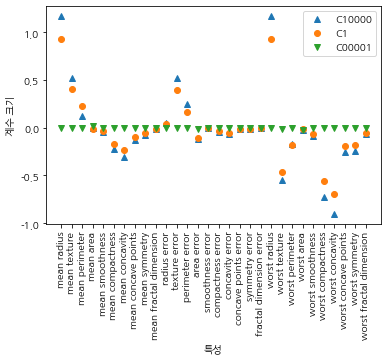

In [81]:
# Logistic Regression 모델의 C값에 따른 계수 확인
plt.plot(logreg_C10000.coef_.T, '^', label='C10000')
plt.plot(logreg_C1.coef_.T, 'o', label='C1')
plt.plot(logreg_C00001.coef_.T, 'v', label='C00001')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
xlims = plt.xlim()
plt.xlim(xlims)
plt.xlabel('특성')
plt.ylabel('계수 크기')
plt.legend()

In [ ]:
# L2규제를 이용하므로 아무리 규제를 강하게(C가 아무리 작아도) 해도 0값이 되지 않음
    # 3번쨰 특성인 mean area 을 보면 흥미롭게 C1, C10000 에선 음수값을, C00001에선 양수값을 가짐
    # 심지어 c00001인경우(규제가 강한경우)에 절대값이 더큼
    # 양성의, 악성의 (종양의) 신호가 모두 될수 있는..
    # 선형 모델의 계수는 항상 의심하고 조심해서 해석해야함

C=0.001인, L1 로지스틱 회귀의 훈련 정확도 : 0.913
C=0.001인, L1 로지스틱 회귀의 테스트 정확도 : 0.923
C=1인, L1 로지스틱 회귀의 훈련 정확도 : 0.960
C=1인, L1 로지스틱 회귀의 테스트 정확도 : 0.958
C=100인, L1 로지스틱 회귀의 훈련 정확도 : 0.986
C=100인, L1 로지스틱 회귀의 테스트 정확도 : 0.979


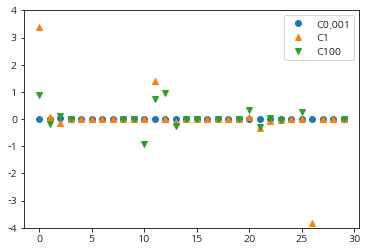

In [94]:
# 좀 더 이해하기 쉬운 L1규제 형태의 모델(모델은 몇개의 특정 특성(계수)만을 사용하게 될 것)
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    logreg_l1 = LogisticRegression(C=C, penalty='l1', solver='liblinear').fit(X_train, y_train)
    # solver, default = lbfgs, 근데 l1 지원 x, 따라서 liblinear 로 매개변수를 지정해줘야 함
    print('C={}인, L1 로지스틱 회귀의 훈련 정확도 : {:.3f}'.format(C,logreg_l1.score(X_train,y_train)))
    print('C={}인, L1 로지스틱 회귀의 테스트 정확도 : {:.3f}'.format(C,logreg_l1.score(X_test,y_test)))
    plt.plot(logreg_l1.coef_.T, marker, label='C{}'.format(C))
    
plt.ylim(-4,4)
plt.legend()

In [ ]:
# 이처럼 이진 분류에서의 선형 모델과 회귀에서의 선형 모델은 유사점이 존재함

## multiclass classification